### Задача 6

Найдем матожидание случайной величины $X$, имеющей указанную плотность.<br>
Интегрируя, находим:<br>
<br>
$\normalsize E(X) \normalsize = \int_{0}^{\infty} \large x \frac{x^{k-1} e^{-x/\theta}}{(k-1)!\theta^k} dx = \frac{\theta}{(k-1)!}\int_{0}^{\infty} (\frac{x}{\theta})^k e^{-x/\theta} d(\frac{x}{\theta}) = \frac{\theta}{(k-1)!}\int_{0}^{\infty} (y)^k e^{-y} d(y) = \frac{\theta}{(k-1)!}Г(k+1) = \frac{k!\theta}{(k-1)!} = k\theta$,<br>
<br>
здесь мы использовали замену $\large y = \frac{x}{\theta}$ и классическое определение гамма-функции $\normalsize Г(a) = \int_{0}^{\infty} x^{a-1} e^{-x} d(x)$, а также ее свойство $Г(n) = (n-1)!, n \in N$.<br>
<br>
Аналогично находим матожидание $X^2$:<br>
<br>
$\normalsize E(X^2) \normalsize = \int_{0}^{\infty} \large x^2 \frac{x^{k-1} e^{-x/\theta}}{(k-1)!\theta^k} dx = \normalsize \frac{\theta^2}{(k-1)!}\int_{0}^{\infty} (\frac{x}{\theta})^{k+1} e^{-x/\theta} d(\frac{x}{\theta}) = \frac{\theta^2}{(k-1)!}\int_{0}^{\infty} (y)^{k+1} e^{-y} d(y) = \frac{\theta^2}{(k-1)!}Г(k+2) = \frac{(k+1)!\theta^2}{(k-1)!} = k(k+1)\theta^2$,<br>
<br>
Тогда дисперсия величины:<br>
<br>
$\text{Var}(X) = E(X^2) - (EX)^2 = k(k+1)\theta^2 - k^2\theta^2 = k\theta^2$.<br>
<br>
Приравнивая полученное матожидание к его выборочному аналогу - выборочному среднему, имеем оценку методом моментов:<br>
<br>
$\normalsize k\hat{\theta}_{\text{MM}} = \overline{x} \longrightarrow \hat{\theta}_{\text{MM}} = \large \frac{\overline{x}}{k}$.<br>
<br>
Т.к. $E(\overline{x}) = E(\sum_{i=1}^{n} x_i)/n = \sum_{i=1}^{n} E(x_i)/n = nk\theta/n = k\theta \longrightarrow E(\hat{\theta}_{\text{MM}}) = E(\large \frac{\overline{x}}{k}) = \large \frac{k\theta}{k} = \normalsize \theta$, <br>
<br>
то оценка несмещена (использовали факт, что выборка i.i.d.)
<br>
<br>
В силу закона больших чисел выборочное среднее по вероятности сходится к матожиданию случайной величины <br>(при условии, что выборка i.i.d. и матожидание величины существует и конечно), поэтому $\overline{x} \xrightarrow{p} E(X) \longrightarrow \hat{\theta}_{\text{MM}} \xrightarrow{p} E(X)/k = k\theta/k = \theta$ и оценка состоятельна.<br>
<br>
Информация Фишера для одного наблюдения имеет вид ($f(x)$ - плотность нашей величины):<br>
<br>
$I(\theta) = E\large(\frac{dln(f(x))}{d\theta})^2 = \normalsize E(\large \frac{d((k-1)ln(x) - x/\theta - ln((k-1)!) - kln(\theta))}{d\theta})^2 =$<br>
<br>
$ = \normalsize E(\large \frac{x}{\theta^2} - \frac{k}{\theta})^2 = \normalsize E( \frac{1}{\theta^2}(x - k\theta))^2 =  \frac{1}{\theta^4}E(x - k\theta)^2 = \frac{1}{\theta^4}\text{Var}(x) = \large \frac{k\theta^2}{\theta^4} = \frac{k}{\theta^2}$.
<br>
<br>
Тогда:<br>
<br>
$\large \frac{1}{nI(\theta)\text{Var}(\hat{\theta}_{\text{MM}})} = \frac{1}{\Large n\frac{k}{\theta^2}\frac{k\theta^2}{k^2n}} = 1$, поэтому оценка эффективна (ее дисперсия достигает в классе несмещенных оценок своей нижней границы по Рао-Фреше-крамеру). <br>
Здесь мы использовали выражение для дисперсии оценки, учитывая, что выборка i.i.d.:<br>
<br>
$\text{Var}(\hat{\theta}_{\text{MM}}) = \text{Var}(\large \frac{\overline{x}}{k}) = \large \frac{\text{Var}(\sum_{i=1}^{n} x_i/n)}{k^2} = \frac{n\text{Var}(x_i)}{n^2k^2} = \frac{k\theta^2}{nk^2} = \frac{\theta^2}{kn}$.<br>
<br>

Проведем теперь эксперимент:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
sample_sizes = [50, 100, 500, 1000, 2500]

In [12]:
res = []
np.random.seed(4443)
for size in sample_sizes:
    samples = np.random.gamma(shape = 3, scale = 2, size = (500, size))
    estimates = np.mean(samples, axis = 1)/3
    temp_res = sum(abs(estimates - 2) > 0.01)
    res.append(temp_res)
    temp_res = -1

In [13]:
sorted(res)

[334, 374, 426, 462, 483]

In [14]:
for ind, elm in enumerate(sample_sizes):
    print(f'Для объема {elm} расхождение между оценкой и истинным значением параметра превысило 0.01 в {res[ind]} случаев')
    print()

Для объема 50 расхождение между оценкой и истинным значением параметра превысило 0.01 в 483 случаев

Для объема 100 расхождение между оценкой и истинным значением параметра превысило 0.01 в 462 случаев

Для объема 500 расхождение между оценкой и истинным значением параметра превысило 0.01 в 426 случаев

Для объема 1000 расхождение между оценкой и истинным значением параметра превысило 0.01 в 374 случаев

Для объема 2500 расхождение между оценкой и истинным значением параметра превысило 0.01 в 334 случаев



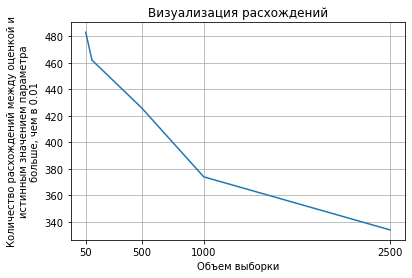

In [15]:
plt.plot(sample_sizes, res)
plt.xlabel("Объем выборки")
plt.ylabel("Количество расхождений между оценкой и"
           "\n"
           "истинным значением параметра" "\n"
           "больше, чем в 0.01")
plt.title(label = "Визуализация расхождений")
plt.xticks([50, 500, 1000, 2500])
plt.grid()
plt.show()

Фактически мы наблюдаем, что с ростом объема выборки количество расхождений между оценкой и истинным значением параметра снижается - т.е. сближение значения оценки и истинного значения параметра. Отметим, что данный результат характеризует состоятельность нашей оценки - действительно, она состоятельна в силу закона больших чисел. <br>
<br>
Отметим также, что количество расхождений достаточно велико даже при большом объеме выборки (больше 1000), это объясняется тем, что дисперсия оценки равна в нашем случае даже при объеме 2500: $ \text{Var}(\hat{\theta}_{\text{MM}}) = \large \frac{\theta^2}{kn} = \frac{4}{7500}$.<br>
Т.е. стандартное отклонение оценки равно $\sqrt{\frac{4}{7500}} = 0.0231$, что больше, чем 0.01. Отсюда велико количество случаев расхождений между оценкой и истинным значением параметра больше, чем в 0.01. 

In [16]:
np.sqrt(4/7500)

0.023094010767585032

### Задача 7

Используем параметризацию $p = \theta$.<br>
Вероятностная масса геометрического распределения (интерпретация - номер первого успеха в схеме Бернулли):<br>
<br>
$P(X = k) = (1-p)^{k-1}p; k \in N$<br>
<br>
Матожидание величины:<br>
<br>
$E(X) = \sum_{k = 1}^{\infty} kP(X = k) = $<br>
<br> $ = \sum_{k = 1}^{\infty} k(1-p)^{k-1}p = \large -\sum_{k = 1}^{\infty} \frac{d((1-p)^k)}{dp}p = -p\frac{d(\sum_{k = 1}^{\infty}(1-p)^k)}{dp} = -p\frac{d((1-p)/(1 - (1-p)))}{dp} = -p\frac{d((1-p)/p)}{dp} = -p \frac{-1}{p^2} = \frac{1}{p}$.<br>
<br>
Здесь мы использовали смену порядка производной и суммирования, т.к. ряд абсолютно сходится, это бесконечно убывающая геометрическая прогрессия со знаменателем $0 \leq 1-p \leq 1$. В добавок использована известная формула суммы членов такой прогрессии.<br>
<br>
Приравнивая полученное ожидание к его выборочному аналогу - выборочному среднему, имеем оценку методом моментов:<br>
<br>
$\large \frac{1}{\hat{\theta}_{\text{MM}}} = \overline{x} \longrightarrow \hat{\theta}_{\text{MM}} = \frac{1}{\overline{x}}$.<br>
<br>
Т.к. в общем случае матожидание нелинейной функции не является таковой же функцией от матожидания, то:<br>
<br>
$\large E(\frac{1}{\overline{x}}) \neq \frac{1}{E(\overline{x})} = \frac{1}{1/\theta} = \theta$ и оценка является смещенной.<br>
<br>
Т.к. оценка смещена, то мы не можем говорить о ее эффективности в классе несмещенных оценок, и неравенство Рао-Фреше-Крамера неприменимо (однако мы можем сравнивать ее (асимптотическую) MSE - среднеквадратическую ошибку, с MSE других оценок, для получения некоторого ранжирования имеющихся оценок по качеству).<br>
<br>
В силу закона больших чисел (он применим, т.к. матожидание величины существует и конечно, и выборка i.i.d.):<br>
<br>
$\large \overline{x} \xrightarrow{p} \normalsize E(X) = \large \frac{1}{\theta} \longrightarrow \normalsize \hat{\theta}_{\text{MM}} = \large \frac{1}{\overline{x}} \xrightarrow{p} \frac{1}{1/\theta} = \theta$, и оценка является состоятельной; <br>
<br>(здесь мы использовали CMT - теорему о непрерывном отображении, для функции $f(x) = \large \frac{1}{x}$, она удовлетворяет условиям теоремы, т.к. и сама случайная величина, и ее матожидание принимают только значения, отличные от 0 (поэтому данная функция от всех этих значений будет непрерывна)).<br>
<br>
Проведем теперь эксперимент:

In [18]:
sample_sizes = [50, 100, 500, 1000, 2500]

In [19]:
res = []
np.random.seed(567)
for size in sample_sizes:
    samples = np.random.geometric(p = 0.3, size = (500, size))
    estimates = 1/(np.mean(samples, axis = 1))
    temp_res = sum(abs(estimates - 0.3) > 0.01)
    res.append(temp_res)
    temp_res = -1

In [20]:
sorted(res)

[23, 89, 194, 349, 400]

In [21]:
res

[400, 349, 194, 89, 23]

In [22]:
for ind, elm in enumerate(sample_sizes):
    print(f'Для объема {elm} расхождение между оценкой и истинным значением параметра превысило 0.01 в {res[ind]} случаев')
    print()

Для объема 50 расхождение между оценкой и истинным значением параметра превысило 0.01 в 400 случаев

Для объема 100 расхождение между оценкой и истинным значением параметра превысило 0.01 в 349 случаев

Для объема 500 расхождение между оценкой и истинным значением параметра превысило 0.01 в 194 случаев

Для объема 1000 расхождение между оценкой и истинным значением параметра превысило 0.01 в 89 случаев

Для объема 2500 расхождение между оценкой и истинным значением параметра превысило 0.01 в 23 случаев



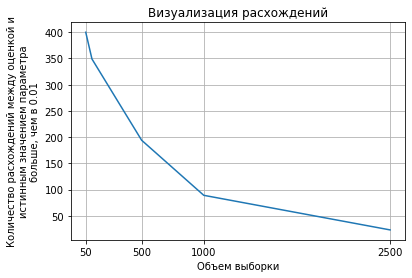

In [23]:
plt.plot(sample_sizes, res)
plt.xlabel("Объем выборки")
plt.ylabel("Количество расхождений между оценкой и"
           "\n"
           "истинным значением параметра" "\n"
           "больше, чем в 0.01")
plt.title(label = "Визуализация расхождений")
plt.xticks([50, 500, 1000, 2500])
plt.grid()
plt.show()

Опять же, наблюдаем уменьшение количества расхождений между значением оценки и истинным значением параметра с ростом объема выборки - это снова подтверждение состоятельности нашей оценки (она состоятельна в силу закона больших чисел). <br>
<br>
Теперь, однако, результат немного другой относительно первой задачи - количество случаев расхождения уменьшается довольно значительно. Это объясняется, например, тем, что смещенная оценка может быть более эффективной, чем несмещенная, в плане минимизации MSE. Здесь мы наблюдаем бОльшую скорость сходимости к истинному значению параметра, чем в предыдущей задаче.